In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Polynomial regression analysis..


In [2]:
# load Data using pandas
csv_path = "DataSets\\StudentsPerformance.csv"
poly_regression_data = pd.read_csv(csv_path)

<span style="color: green; font-weight: bold; font-size: 30px;">Pre-Processing for polynomial analysis...</span>


In [382]:
poly_regression_data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [383]:
poly_regression_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [384]:
# check missing values
print("Missing values: ", poly_regression_data.isnull().sum(), "\n")

Missing values:  gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64 



In [385]:
# check type
print("Data types: ", poly_regression_data.dtypes)

Data types:  gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


In [386]:
# Calculate the total score
total_score = poly_regression_data['math score'] + poly_regression_data['reading score'] + poly_regression_data['writing score']
total_score.head(5)

0    218
1    247
2    278
3    148
4    229
dtype: int64

In [387]:
# Calculate the percentage of the score
percent_score = round((total_score / 300) * 100, 2)
percent_score.head(5)

0    72.67
1    82.33
2    92.67
3    49.33
4    76.33
dtype: float64

In [388]:
# add the calculated column
poly_regression_data['Score'] = percent_score

In [389]:
poly_regression_data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


In [390]:
# add a column that show the case of the student which will be the target
poly_regression_data['Pass'] = poly_regression_data['Score'].apply(lambda x: 1 if x >= 50 else 0)

In [391]:
# drop the un_needed score
poly_regression_data = poly_regression_data.drop(['math score', 'reading score', 'writing score', 'Score'], axis=1)

In [392]:
poly_regression_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   Pass                         1000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


<span style="color: red; font-size: 30px">Encoding the categorical data</span>

<span style="color: blue; font-size: 25px">-- gender column</span>

In [393]:
poly_regression_data['gender'].unique()

array(['female', 'male'], dtype=object)

In [394]:
# encode male with 1 and female to 0
poly_regression_data['gender'] = [1 if value == 'male' else 0 for value in poly_regression_data['gender']]

In [395]:
poly_regression_data['gender'].unique()

array([0, 1])

<span style="color: blue; font-size: 25px">-- race/ethnicity column</span>

In [396]:
poly_regression_data['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [397]:
poly_regression_data['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [398]:
# Create the encoder using sklearn
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded = encoder.fit_transform(poly_regression_data[['race/ethnicity']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['race/ethnicity']))

#Encode the values
poly_regression_data = pd.concat([poly_regression_data.drop('race/ethnicity', axis=1), encoded_df], axis=1)

<span style="color: blue; font-size: 25px">-- parental level of education column</span>

In [399]:
poly_regression_data['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [400]:
poly_regression_data['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [401]:
# Create the encoder using sklearn
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded = encoder.fit_transform(poly_regression_data[['parental level of education']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['parental level of education']))

#Encode the values
poly_regression_data = pd.concat([poly_regression_data.drop('parental level of education', axis=1), encoded_df], axis=1)

<span style="color: blue; font-size: 25px">-- lunch column</span>

In [402]:
poly_regression_data['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [403]:
poly_regression_data['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [404]:
# Create the encoder using sklearn
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded = encoder.fit_transform(poly_regression_data[['lunch']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['lunch']))

#Encode the values
poly_regression_data = pd.concat([poly_regression_data.drop('lunch', axis=1), encoded_df], axis=1)

<span style="color: blue; font-size: 25px">-- test preparation course column</span>

In [405]:
poly_regression_data['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [406]:
# encode male with 1 and female to 0
poly_regression_data['test preparation course'] = [1 if value == 'completed' else 0 for value in poly_regression_data['test preparation course']]

In [407]:
poly_regression_data['test preparation course'].unique()

array([0, 1])

In [408]:
poly_regression_data.shape

(1000, 13)

In [409]:
poly_regression_data.head()

,gender,test preparation course,Pass,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard
0,0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


___

<span style="color:rgb(181, 52, 255); font-weight: bold; font-size: 25px;">-- Divide data into target variable and predictors </span>


In [410]:
Y = poly_regression_data['Pass']
X = poly_regression_data.drop(['Pass'], axis = 1)

In [411]:
Y.head(5)

0    1
1    1
2    1
3    0
4    1
Name: Pass, dtype: int64

In [412]:
X.head(5)

,gender,test preparation course,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard
0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


<span style="color:rgb(181, 52, 255); font-weight: bold; font-size: 25px;">-- Split the data into 80/20 </span>

In [413]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [414]:
X_train

,gender,test preparation course,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard
600,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
80,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
158,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
423,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
747,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
579,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
502,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
537,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
196,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [415]:
X_test

,gender,test preparation course,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard
778,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
334,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
271,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
802,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
216,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
371,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
411,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
644,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
981,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [416]:
Y_train

600    1
80     0
158    1
423    1
747    1
      ..
579    1
502    1
537    1
196    1
175    1
Name: Pass, Length: 800, dtype: int64

In [417]:
Y_test

778    1
334    1
271    0
802    1
216    1
      ..
371    1
411    1
644    1
981    1
365    1
Name: Pass, Length: 200, dtype: int64

<span style="color:rgb(181, 52, 255); font-weight: bold; font-size: 25px;">-- Polynomial models </span>

<span style="color:red; font-weight: bold; font-size: 22px;">-- Model in degree_2 </span>

<span style="color:cyan; font-weight: bold; font-size: 20px;"> 1.Polynomial Features </span>

In [418]:
# Create PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)

# train the model
x_train_deg2 = poly_features.fit_transform(X_train)

# test the model
x_test_deg2 = poly_features.transform(X_test)

<span style="color:cyan; font-weight: bold; font-size: 20px;"> 2. Train the model </span>

In [419]:
deg2_model = LinearRegression()
deg2_model.fit(x_train_deg2, Y_train)

LinearRegression()

<span style="color:cyan; font-weight: bold; font-size: 20px;"> 4. Prediction phase </span>

In [420]:
y_train_pred_deg2 = deg2_model.predict(x_train_deg2)
y_test_pred_deg2 = deg2_model.predict(x_test_deg2)

<span style="color:cyan; font-weight: bold; font-size: 20px;"> 5. Visualization phase </span>

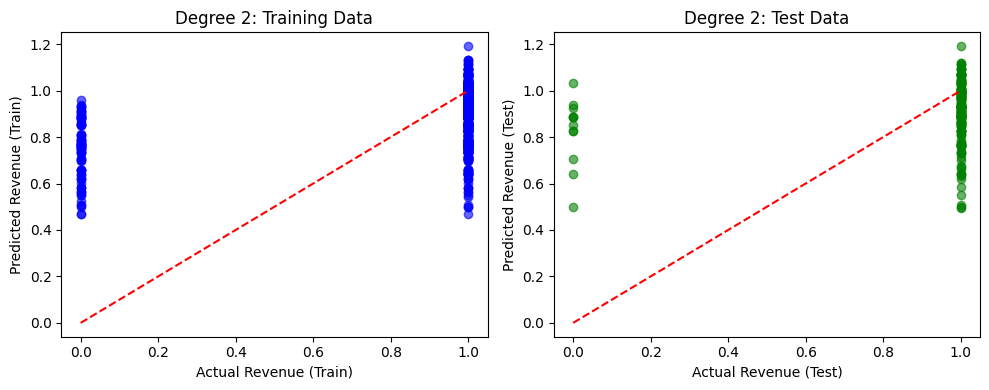

In [421]:
plt.figure(figsize=(10, 4))

# Training Data
plt.subplot(1, 2, 1)
plt.scatter(Y_train, y_train_pred_deg2, color='blue', alpha=0.6)
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'r--')
plt.xlabel("Actual Revenue (Train)")
plt.ylabel("Predicted Revenue (Train)")
plt.title("Degree 2: Training Data")

# Testing Data
plt.subplot(1, 2, 2)
plt.scatter(Y_test, y_test_pred_deg2, color='green', alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.xlabel("Actual Revenue (Test)")
plt.ylabel("Predicted Revenue (Test)")
plt.title("Degree 2: Test Data")

plt.tight_layout()
plt.show()

<span style="color:cyan; font-weight: bold; font-size: 20px;"> 5. Evaluate the model </span>

In [422]:
deg2_MSE_train = mean_squared_error(Y_train, y_train_pred_deg2)
deg2_MSE_test = mean_squared_error(Y_test, y_test_pred_deg2)

deg2_r2_score_train = r2_score(Y_train, y_train_pred_deg2)
deg2_r2_score_test = r2_score(Y_test, y_test_pred_deg2)

print(f"Training MSE: {deg2_MSE_train:.4f}, R²: {deg2_r2_score_train:.4f}")
print(f"Testing MSE: {deg2_MSE_test:.4f}, R²: {deg2_r2_score_test:.4f}")

Training MSE: 0.0854, R²: 0.1529
Testing MSE: 0.0643, R²: -0.1401


<span style="color:red; font-weight: bold; font-size: 22px;">-- Model in degree_3 </span>

<span style="color:cyan; font-weight: bold; font-size: 20px;"> 1.Polynomial Features </span>

In [423]:
# Create PolynomialFeatures
poly_features = PolynomialFeatures(degree=3)

# train the model
x_train_deg3 = poly_features.fit_transform(X_train)

# test the model
x_test_deg3 = poly_features.transform(X_test)

<span style="color:cyan; font-weight: bold; font-size: 20px;"> 2. Train the model </span>

In [424]:
deg3_model = LinearRegression()
deg3_model.fit(x_train_deg3, Y_train)

LinearRegression()

<span style="color:cyan; font-weight: bold; font-size: 20px;"> 3. Prediction phase </span>

In [425]:
y_train_pred_deg3 = deg3_model.predict(x_train_deg3)
y_test_pred_deg3 = deg3_model.predict(x_test_deg3)

<span style="color:cyan; font-weight: bold; font-size: 20px;"> 4. Visualization phase </span>

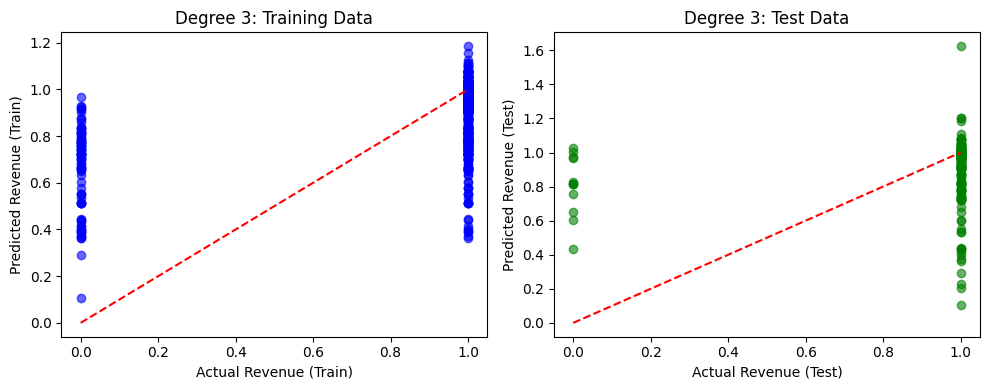

In [426]:
plt.figure(figsize=(10, 4))

# Training Data
plt.subplot(1, 2, 1)
plt.scatter(Y_train, y_train_pred_deg3, color='blue', alpha=0.6)
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'r--')
plt.xlabel("Actual Revenue (Train)")
plt.ylabel("Predicted Revenue (Train)")
plt.title("Degree 3: Training Data")

# Testing Data
plt.subplot(1, 2, 2)
plt.scatter(Y_test, y_test_pred_deg3, color='green', alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.xlabel("Actual Revenue (Test)")
plt.ylabel("Predicted Revenue (Test)")
plt.title("Degree 3: Test Data")

plt.tight_layout()
plt.show()

<span style="color:cyan; font-weight: bold; font-size: 20px;"> 5. Evaluate the model </span>

In [427]:
deg3_MSE_train = mean_squared_error(Y_train, y_train_pred_deg3)
deg3_MSE_test = mean_squared_error(Y_test, y_test_pred_deg3)

deg3_r2_score_train = r2_score(Y_train, y_train_pred_deg3)
deg3_r2_score_test = r2_score(Y_test, y_test_pred_deg3)

print(f"Training MSE: {deg3_MSE_train:.4f}, R²: {deg3_r2_score_train:.4f}")
print(f"Testing MSE: {deg3_MSE_test:.4f}, R²: {deg3_r2_score_test:.4f}")

Training MSE: 0.0755, R²: 0.2509
Testing MSE: 0.0865, R²: -0.5329


<span style="color:red; font-weight: bold; font-size: 22px;">-- Model in degree_4 </span>

<span style="color:cyan; font-weight: bold; font-size: 20px;"> 1.Polynomial Features </span>

In [428]:
# Create PolynomialFeatures
poly_features = PolynomialFeatures(degree=4)

# train the model
x_train_deg4 = poly_features.fit_transform(X_train)

# test the model
x_test_deg4 = poly_features.transform(X_test)

<span style="color:cyan; font-weight: bold; font-size: 20px;"> 2. Train the model </span>

In [429]:
deg4_model = LinearRegression()
deg4_model.fit(x_train_deg4, Y_train)

LinearRegression()

<span style="color:cyan; font-weight: bold; font-size: 20px;"> 3. Prediction phase </span>

In [430]:
y_train_pred_deg4 = deg4_model.predict(x_train_deg4)
y_test_pred_deg4 = deg4_model.predict(x_test_deg4)

<span style="color:cyan; font-weight: bold; font-size: 20px;"> 4. Visualization phase </span>

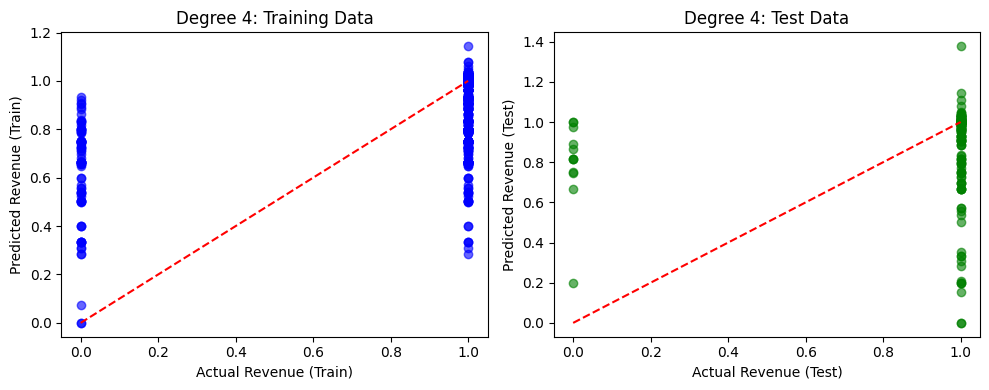

In [431]:
plt.figure(figsize=(10, 4))

# Training Data
plt.subplot(1, 2, 1)
plt.scatter(Y_train, y_train_pred_deg4, color='blue', alpha=0.6)
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'r--')
plt.xlabel("Actual Revenue (Train)")
plt.ylabel("Predicted Revenue (Train)")
plt.title("Degree 4: Training Data")

# Training Data
plt.subplot(1, 2, 2)
plt.scatter(Y_test, y_test_pred_deg4, color='green', alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.xlabel("Actual Revenue (Test)")
plt.ylabel("Predicted Revenue (Test)")
plt.title("Degree 4: Test Data")

plt.tight_layout()
plt.show()

<span style="color:cyan; font-weight: bold; font-size: 20px;"> 5. Evaluate the model </span>

In [432]:
deg4_MSE_train = mean_squared_error(Y_train, y_train_pred_deg4)
deg4_MSE_test = mean_squared_error(Y_test, y_test_pred_deg4)

deg4_r2_score_train = r2_score(Y_train, y_train_pred_deg4)
deg4_r2_score_test = r2_score(Y_test, y_test_pred_deg4)

print(f"Training MSE: {deg4_MSE_train:.4f}, R²: {deg4_r2_score_train:.4f}")
print(f"Testing MSE: {deg4_MSE_test:.4f}, R²: {deg4_r2_score_test:.4f}")

Training MSE: 0.0716, R²: 0.2898
Testing MSE: 0.0946, R²: -0.6774


<span style="color:rgb(181, 52, 255); font-weight: bold; font-size: 25px;">-- comparing models </span>

In [434]:
# models
degrees = ['Degree 2', 'Degree 3', 'Degree 4']

# features
MSE = [deg2_MSE_test, deg3_MSE_test, deg4_MSE_test]
R2_Score = [deg2_r2_score_test, deg3_r2_score_test, deg4_r2_score_test]

In [ ]:
plt.figure(figsize=(12, 5))

# MSE
plt.subplot(1, 2, 1)
plt.bar(degrees, test_mse, color='tomato')
plt.title('Test MSE Comparison')
plt.ylabel('MSE')
plt.xlabel('Polynomial Degree')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# R2
plt.subplot(1, 2, 2)
plt.bar(degrees, test_r2, color='royalblue')
plt.title('Test R² Score Comparison')
plt.ylabel('R² Score')
plt.xlabel('Polynomial Degree')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>